In [1]:
from tdavec import createEllipse, TDAvectorizer, tdavec_core
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Hello from tdavec


In [2]:
?tdavec.tdavec_core.computeAlgebraicFunctions

Object `tdavec.tdavec_core.computeAlgebraicFunctions` not found.


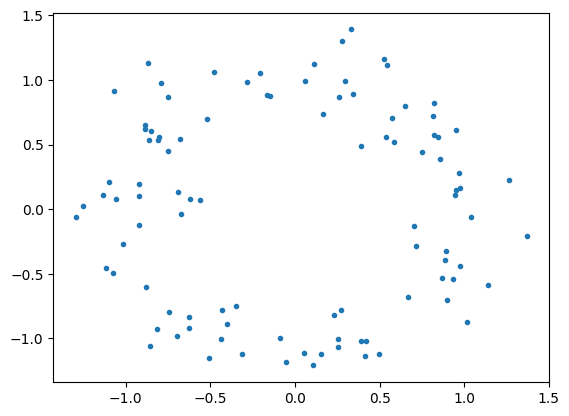

In [3]:
X = pd.read_csv("../tdavec/unitCircle.csv", skiprows=1).to_numpy()
plt.plot(X[:,0], X[:,1], ".")
plt.show()

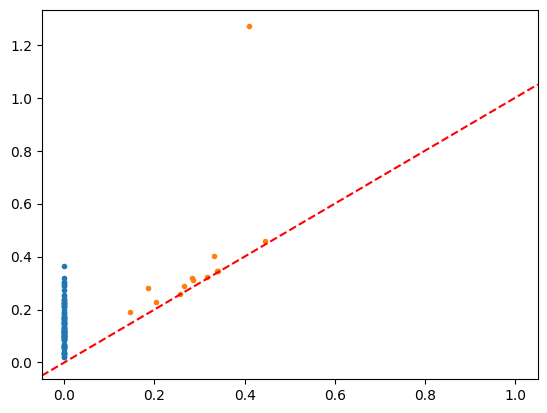

In [4]:
v = TDAvectorizer()
v.fit([X])
PD = v.diags[0]
plt.plot(PD[0][:,0], PD[0][:,1], ".")
plt.plot(PD[1][:,0], PD[1][:,1], ".")
plt.axline((0,0), (1,1), color="r",linestyle="dashed")

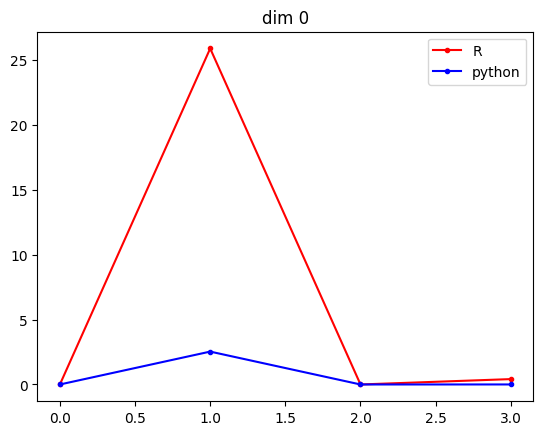

In [18]:
v.setParams({"output":"algebra"})
python = v.transform(homDim=0)[0]
R = np.array([0,25.8803884718878,0,0.414197953470299])
plt.plot(R, "r.-", label = "R")
plt.plot(python, "b.-", label = "python")
plt.title("dim 0")
plt.legend()
plt.show()

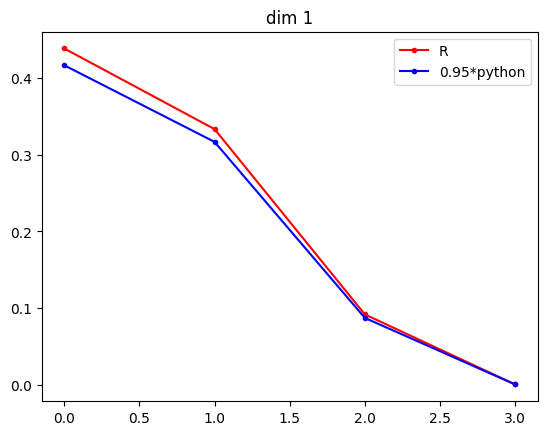

In [23]:
v.setParams({"output":"algebra"})
python = v.transform(homDim=1)[0]
R = np.array([0.438920678383275,0.333573729178711,0.0915972597177655,0.000100476536448101])
plt.plot(R, "r.-", label = "R")
plt.plot(0.95*python, "b.-", label = "0.95*python")
plt.title("dim 1")
plt.legend()
plt.show()

In [57]:
pd = PD[0]
pd = np.vstack([ [0, 2], pd])
dMax = max(pd[:,1])
pers = pd[:,1]-pd[:,0]

In [59]:
np.sum((dMax - pd[:,1])*pers)

25.73324493802523

In [60]:
def computeAlgebraicFunctions(PD, homDim, maxThr):
    pd = PD[homDim]
    if homDim == 0:
        pd = np.vstack([pd, [0, maxThr]])
    dMax = max(pd[:,1])
    print("dMax=", dMax)
    pers = pd[:,1]-pd[:,0]
    return(np.array([
        np.sum(pd[:,0]*pers),
        np.sum( (dMax - pd[:,1])*pers),
        np.sum( pd[:,0]**2 * pers**4),
        np.sum( (dMax - pd[:,1])**2*pers**2)
    ]))


In [62]:
computeAlgebraicFunctions(PD, 1, 2)

dMax= 1.2692121267318726


array([0.43892069, 0.33357375, 0.09159725, 0.01740429])

In [44]:
np.vstack([PD[0], [0, v.params["threshold"]]])

array([[0.        , 0.02041084],
       [0.        , 0.02051534],
       [0.        , 0.03163802],
       [0.        , 0.03196964],
       [0.        , 0.03310784],
       [0.        , 0.03541122],
       [0.        , 0.03557534],
       [0.        , 0.03896011],
       [0.        , 0.05202492],
       [0.        , 0.05476255],
       [0.        , 0.05700218],
       [0.        , 0.05853151],
       [0.        , 0.06107267],
       [0.        , 0.06140893],
       [0.        , 0.06226637],
       [0.        , 0.06261025],
       [0.        , 0.06646532],
       [0.        , 0.06915883],
       [0.        , 0.08323621],
       [0.        , 0.0835015 ],
       [0.        , 0.0880843 ],
       [0.        , 0.08917707],
       [0.        , 0.08960409],
       [0.        , 0.09161533],
       [0.        , 0.09391432],
       [0.        , 0.09477938],
       [0.        , 0.09636623],
       [0.        , 0.10084815],
       [0.        , 0.10086332],
       [0.        , 0.10089514],
       [0.

In [41]:
PD = v.diags[0]
computeAlgebraicFunctions(PD,1)

dMax= 1.2692121267318726


array([0.43892069, 0.33357375, 0.09159725, 0.01740429])

In [42]:
v.params

{'output': 'vpb',
 'threshold': 2,
 'inf': None,
 'maxDim': 1,
 'scale': array([0.02218287, 0.12372865, 0.22527443, 0.32682021, 0.428366  ,
        0.52991178, 0.63145756, 0.73300334, 0.83454913, 0.93609491,
        1.03764069]),
 'nGrid': 11,
 'quantiles': False,
 'tau': 0.3,
 'k': 1,
 'sigma': 1,
 'kFDA': 10}

In [40]:
PD[0]

array([[0.        , 0.02041084],
       [0.        , 0.02051534],
       [0.        , 0.03163802],
       [0.        , 0.03196964],
       [0.        , 0.03310784],
       [0.        , 0.03541122],
       [0.        , 0.03557534],
       [0.        , 0.03896011],
       [0.        , 0.05202492],
       [0.        , 0.05476255],
       [0.        , 0.05700218],
       [0.        , 0.05853151],
       [0.        , 0.06107267],
       [0.        , 0.06140893],
       [0.        , 0.06226637],
       [0.        , 0.06261025],
       [0.        , 0.06646532],
       [0.        , 0.06915883],
       [0.        , 0.08323621],
       [0.        , 0.0835015 ],
       [0.        , 0.0880843 ],
       [0.        , 0.08917707],
       [0.        , 0.08960409],
       [0.        , 0.09161533],
       [0.        , 0.09391432],
       [0.        , 0.09477938],
       [0.        , 0.09636623],
       [0.        , 0.10084815],
       [0.        , 0.10086332],
       [0.        , 0.10089514],
       [0.